In [1]:
def butterworthLP(D0,imgShape):
    M,N=mat_r.shape
    H=np.zeros((M,N), dtype=np.float32)
#D0=10
    n=0.5
    for u in range(M):
        for v in range(N):
            D=np.sqrt((u-M/2)**2+(v-N/2)**2)
            H[u,v]=1/(1+(D/D0)**(2*n))
    return H

def butterworthHP(D0,imgShape):
    M,N=mat_r.shape
    H=np.zeros((M,N), dtype=np.float32)
#D0=10
    n=0.5
    for u in range(M):
        for v in range(N):
            D=np.sqrt((u-M/2)**2+(v-N/2)**2)
            H[u,v]=1-(1/(1+(D/D0)**(2*n)))
    return H

In [23]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  2 02:18:36 2023

@author: Alexandros
"""

# Machine learning model code goes here
#first load the train and test data set
import os
import pandas as pd
import numpy as np
from visualise import plot_digi_fig
import matplotlib.pyplot as plt
from dataloader import  FFT_transform_ST

ind_array=[112, 126, 128, 127, 115, 52, 124, 130, 67, 187, 97, 157, 22, 84, 110, 7, 92, 162, 37, 47, 82, 95, 172, 79, 6]

entries = os.listdir('Data/')
#print(entries)
train_data=[k for k in entries if 'train' in k]
#print(train_data)

X_title_train=[]
X_data_train = []


for entry in train_data:
    name=entry
    
    res = "".join([ele for ele in entry if ele.isdigit()])  # keep only the integer part of the path
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))
    
            #here we apply the FFT transform
            #X_data_train.append(np.array(FFT_transform_ST(mat_r)))
            [amp,phase]=np.array(FFT_transform_ST(mat_r))
            #LowPassamp=amp*butterworthHP(10,amp.shape)
            #LowPassphase=phase*butterworthHP(10,amp.shape)
            amp_new=amp.flatten()
            amp_new=amp_new[ind_array]
            phase_new=phase.flatten()
            phase_new=phase_new[ind_array]
            X_data_train.append(np.array([amp_new,phase_new]))
            

            X_title_train.append(int(res))

X_data_train = np.array(X_data_train)  
  
test_data=[k for k in entries if 'test' in k]
#print(test_data)

#create nested lists for storing reasons
X_title_test=[]
X_data_test = []



for entry in test_data:
    name=entry
    
    res = "".join([ele for ele in entry if ele.isdigit()])  # keep only the integer part of the path
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))   

            #X_data_test.append(np.array(FFT_transform_ST(mat_r)))
            [amp,phase]=np.array(FFT_transform_ST(mat_r))
            #amp=amp[ ]
            #LowPassamp=amp*butterworthHP(10,amp.shape)
            
            #LowPassphase=phase*butterworthHP(10,amp.shape)
            amp_new=amp.flatten()
            amp_new=amp_new[ind_array]
            phase_new=phase.flatten()
            phase_new=phase_new[ind_array]
            X_data_test.append(np.array([amp_new,phase_new]))
 
            X_title_test.append(int(res))
   
X_data_test = np.array( X_data_test)      


X_train_lable = X_title_train
X_test_lable = X_title_test
#print(res_test)
#print(X_title_train)








LR: accuracy WITHOUT parameter tuning:
74.3
LR: accuracy WITH parameter tuning:
78.2
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       100
           1       0.97      0.94      0.95       100
           2       0.68      0.71      0.70       100
           3       0.75      0.77      0.76       100
           4       0.83      0.85      0.84       100
           5       0.69      0.62      0.65       100
           6       0.61      0.70      0.65       100
           7       0.80      0.83      0.81       100
           8       0.69      0.56      0.62       100
           9       0.76      0.68      0.72       100

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000



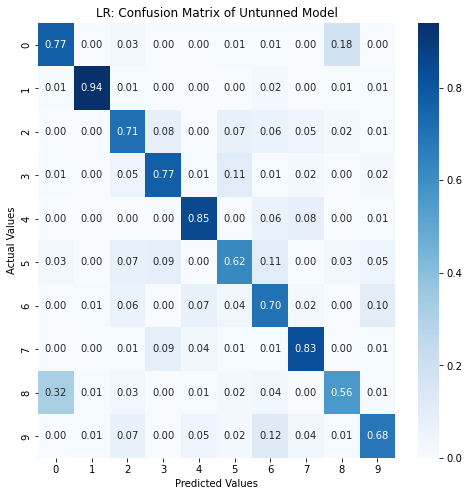

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       100
           1       0.85      0.94      0.90       100
           2       0.75      0.71      0.73       100
           3       0.77      0.84      0.80       100
           4       0.88      0.80      0.84       100
           5       0.75      0.68      0.71       100
           6       0.79      0.80      0.80       100
           7       0.88      0.90      0.89       100
           8       0.65      0.53      0.58       100
           9       0.78      0.84      0.81       100

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



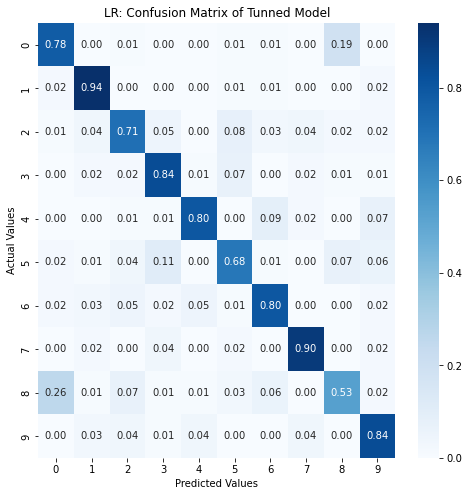

In [24]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore') # I use that here as the GridSearchCV function generates a number of warning cluttering your console

from sklearn.linear_model import LogisticRegression


############################--------------Linear Regression-----------##############################

x_train = X_data_train
x_train = x_train.reshape(1000,-1)
y_train = X_title_train

x_test= X_data_test
x_test = x_test.reshape(1000,-1)
y_test= X_title_test

logR = LogisticRegression()
logR2= LogisticRegression()
parameters_lr = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],}

lrGrid1 = GridSearchCV(logR,
                   param_grid = parameters_lr,
                   scoring='accuracy',
                   cv=2) # here I only selected 2 iteration of the CV as higher values significantly increase the computation time

lr_b= lrGrid1

lr_b.fit(x_train,y_train)




#check accuracy without parameter tuning 
test_np = logR.fit(x_train,y_train)
fft_pred_np= test_np.predict(x_test)
#check predictions with tunned model
fft_pred_p= lr_b.predict(x_test)



print("LR: accuracy WITHOUT parameter tuning:")
print(round(sum(fft_pred_np==y_test)/len(y_test)*100,1))


print("LR: accuracy WITH parameter tuning:")
print(round(sum(fft_pred_p==y_test)/len(y_test)*100,1))





cm1 = confusion_matrix(y_test, fft_pred_np,normalize='true')
labels = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, fft_pred_np)) 
fig, ax = plt.subplots(figsize=(8,8))
sns_plot = sns.heatmap(cm1, annot=True, fmt='.2f', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.title('LR: Confusion Matrix of Untunned Model')
plt.show()
fig.savefig('Conf_Matrix_LR_Untunned.png',bbox_inches='tight',dpi=150)

cm2 = confusion_matrix(y_test, fft_pred_p,normalize='true')
labels = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, fft_pred_p)) 
fig, ax = plt.subplots(figsize=(8,8))
sns_plot = sns.heatmap(cm2, annot=True, fmt='.2f', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.title('LR: Confusion Matrix of Tunned Model')
plt.show()
#fig.savefig('Conf_Matrix_LR_Tunned.png',bbox_inches='tight',dpi=150)




In [25]:
print(X_data_train.shape)

(1000, 2, 25)
